In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from keras.datasets import cifar10
import cv2
from sklearn import svm
from sklearn import metrics
import seaborn as sns
import pandas as pd
from sklearn.metrics import f1_score

In [3]:
# 168501,172177 Inzynieria Biomedyczna 

In [4]:
#classes for "Sztuczna Inteligencja 1" = plane 0, cat 3, truck 9
#loading data

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

index_train = np.where((y_train == 0) | (y_train == 3) | (y_train == 9))
index_test = np.where((y_test == 0) | (y_test == 3) | (y_test == 9))

X_train = X_train[index_train[0]]
y_train = y_train[index_train[0]]
X_test = X_test[index_test[0]]
y_test = y_test[index_test[0]]

print ('Train image shape:    {0}'.format(X_train.shape))
print ('Train label shape:    {0}'.format(y_train.shape))
print ('Test image shape:     {0}'.format(X_test.shape))
print ('Test label shape:     {0}'.format(y_test.shape))


Train image shape:    (15000, 32, 32, 3)
Train label shape:    (15000, 1)
Test image shape:     (3000, 32, 32, 3)
Test label shape:     (3000, 1)


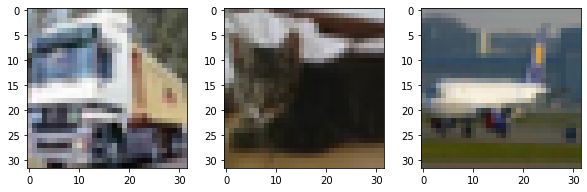

In [5]:
#visualizing data

plt.figure(figsize=(10, 10)) 

plt.subplot(3, 3, 1)
plt.imshow(X_train[0])

plt.subplot(3, 3, 2)
plt.imshow(X_train[2])

plt.subplot(3, 3, 3)
plt.imshow(X_train[30])

plt.show()

In [6]:
#converting into grayscale

X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])
print ('Train image shape:    {0}'.format(X_train.shape))
print ('Train label shape:    {0}'.format(y_train.shape))
print ('Test image shape:     {0}'.format(X_test.shape))
print ('Test label shape:     {0}'.format(y_test.shape))


Train image shape:    (15000, 32, 32)
Train label shape:    (15000, 1)
Test image shape:     (3000, 32, 32)
Test label shape:     (3000, 1)


In [7]:
#preprocessing: normalize

X_train  = X_train/255
X_test  = X_test/255
print ('Train image shape:    {0}'.format(X_train.shape))
print ('Train label shape:    {0}'.format(y_train.shape))
print ('Test image shape:     {0}'.format(X_test.shape))
print ('Test label shape:     {0}'.format(y_test.shape))


Train image shape:    (15000, 32, 32)
Train label shape:    (15000, 1)
Test image shape:     (3000, 32, 32)
Test label shape:     (3000, 1)


In [8]:
type(X_test)

numpy.ndarray

In [9]:
#preprocessing: reshape

X_train = np.reshape(X_train, (X_train.shape[0], -1)) 
X_test = np.reshape(X_test, (X_test.shape[0], -1)) 

print ('Train image shape:    {0}'.format(X_train.shape))
print ('Train label shape:    {0}'.format(y_train.shape))
print ('Test image shape:     {0}'.format(X_test.shape))
print ('Test label shape:     {0}'.format(y_test.shape))

Train image shape:    (15000, 1024)
Train label shape:    (15000, 1)
Test image shape:     (3000, 1024)
Test label shape:     (3000, 1)


In [10]:
print ('Train image shape:    {0}'.format(X_train.shape))
print ('Train label shape:    {0}'.format(y_train.shape))
print ('Test image shape:     {0}'.format(X_test.shape))
print ('Test label shape:     {0}'.format(y_test.shape))


Train image shape:    (15000, 1024)
Train label shape:    (15000, 1)
Test image shape:     (3000, 1024)
Test label shape:     (3000, 1)


In [11]:
#SVM supervised learning 

In [12]:
y_train= y_train.ravel()
y_test= y_test.ravel()

In [13]:
model = svm.SVC(kernel='rbf', C=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
print("Accuracy ->",metrics.accuracy_score(y_test, y_pred))
print("Precision ->",metrics.precision_score(y_test, y_pred,average='micro'))
print("Recall ->",metrics.recall_score(y_test, y_pred,average='micro'))

Accuracy -> 0.765
Precision -> 0.765
Recall -> 0.765


Text(0.5, 257.44, 'Predicted')

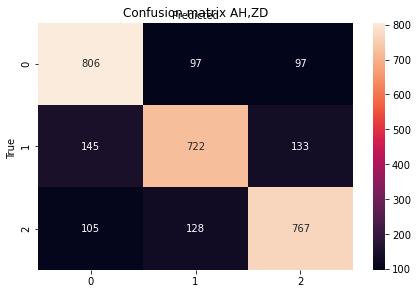

In [17]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
#class_names=[] # nazwy klas
fig, ax = plt.subplots()
# tworzenie mapy cieplnej
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix AH,ZD', y=1.0)
plt.ylabel('True ')
plt.xlabel('Predicted')

In [18]:
print("F1 ->",f1_score(y_test, y_pred, average='macro'))

F1 -> 0.7646175824497022


### Dodatkowa komórka na testy:

Tutaj mieliśmy problem z poleceniem z Panią Zuzanną, nasz model ma być testowany na nieznanym zbiorze. Przyznam że nie wiem jak napisać coś co rozpakuje mi pliki o nieznanym formacie  i przetworzy je do wejścia naszego modelu. Pseudo kod powinien wyglądać mniej więcej tak.

`
path =  // pliknieznany.format
data=unpack(path)
data = data.to_numpy
X_test2,y_test2 = split(data)
y_pred2 = model.predict(X_test2)
`